In [41]:
import pandas as pd

def load_boston():
    # Load the dataset
    df = pd.read_csv('boston_house_prices.csv')

    # Separate the features and target
    print(df.head())
    x = df.drop('MEDV', axis=1).values
    y = df['MEDV'].values

    return x, y

In [42]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import fetch_california_housing

# load boston housing price dataset
x, y = load_boston()
print(y.mean())
# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_bar = np.mean(x_train,axis=0)
x_std = np.std(x_train,axis=0)
x_train_scaled = (x_train - x_bar)/x_std
x_test_scaled = (x_test - x_bar)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
22.532806324110677
(404, 13)
(404,)
(102, 13)
(102,)


In [43]:
# Step 2: Add intercept terms and initialize parameters
intercept_train = np.ones((N_train,1))
x_train_scaled = np.hstack((intercept_train,x_train_scaled))

intercept_test = np.ones((x.shape[0] - N_train,1))
x_test_scaled = np.hstack((intercept_test,x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

(404, 14)
(102, 14)


In [ ]:
# Step 3: Train the lasso regression model
from sklearn import linear_model
LASSO = linear_model.Lasso(alpha=0.1)
LASSO.fit(x_train_scaled,y_train)

print(LASSO.intercept_)

TypeError: ElasticNet.fit() got an unexpected keyword argument 'max_iter'

In [45]:
# Step 4: predict the price, calculate the cost and compare with the linear regression
from sklearn import metrics
y_pred=LASSO.predict(x_test_scaled)
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
print("MAE of LASSO model:",mae)
print("MSE of LASSO model:",mse)
print()
LINEAR=linear_model.LinearRegression()
LINEAR.fit(x_train_scaled,y_train)
y_pred_lin=LINEAR.predict(x_test_scaled)
mae_lin=metrics.mean_absolute_error(y_test,y_pred_lin)
mse_lin=metrics.mean_squared_error(y_test,y_pred_lin)
print("MAE of linear model:",mae_lin)
print("MSE of linear model:",mse_lin)

MAE of LASSO model: 4.373323003374425
MSE of LASSO model: 28.43677085964768

MAE of linear model: 4.730017250961024
MSE of linear model: 32.7998626802069


In [46]:
# Step 4: How to know if overfitting happen?
from sklearn import metrics

# ---- LASSO ----
y_pred_train_LASSO = LASSO.predict(x_train_scaled)
y_pred_test_LASSO = LASSO.predict(x_test_scaled)

mae_train_LASSO = metrics.mean_absolute_error(y_train, y_pred_train_LASSO)
mse_train_LASSO = metrics.mean_squared_error(y_train, y_pred_train_LASSO)

mae_test_LASSO = metrics.mean_absolute_error(y_test, y_pred_test_LASSO)
mse_test_LASSO = metrics.mean_squared_error(y_test, y_pred_test_LASSO)

print("LASSO:")
print(f"  Train MAE: {mae_train_LASSO:.4f}, Train MSE: {mse_train_LASSO:.4f}")
print(f"  Test  MAE: {mae_test_LASSO:.4f}, Test  MSE: {mse_test_LASSO:.4f}")
print()

# ---- LINEAR REGRESSION ----
LINEAR = linear_model.LinearRegression()
LINEAR.fit(x_train_scaled, y_train)

y_pred_train_LINEAR = LINEAR.predict(x_train_scaled)
y_pred_test_LINEAR = LINEAR.predict(x_test_scaled)

mae_train_LINEAR = metrics.mean_absolute_error(y_train, y_pred_train_LINEAR)
mse_train_LINEAR = metrics.mean_squared_error(y_train, y_pred_train_LINEAR)

mae_test_LINEAR = metrics.mean_absolute_error(y_test, y_pred_test_LINEAR)
mse_test_LINEAR = metrics.mean_squared_error(y_test, y_pred_test_LINEAR)

print("LINEAR REGRESSION:")
print(f"  Train MAE: {mae_train_LINEAR:.4f}, Train MSE: {mse_train_LINEAR:.4f}")
print(f"  Test  MAE: {mae_test_LINEAR:.4f}, Test  MSE: {mse_test_LINEAR:.4f}")


LASSO:
  Train MAE: 3.2660, Train MSE: 23.1589
  Test  MAE: 4.3733, Test  MSE: 28.4368

LINEAR REGRESSION:
  Train MAE: 3.3105, Train MSE: 22.7784
  Test  MAE: 4.7300, Test  MSE: 32.7999


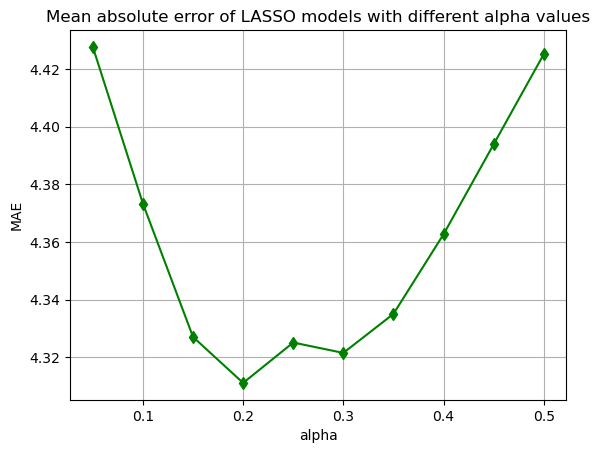

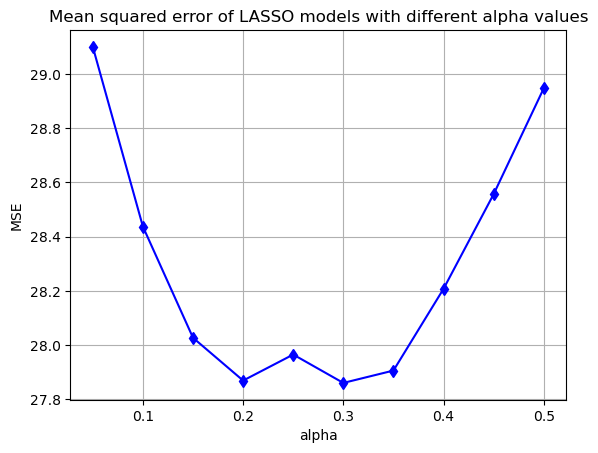

In [47]:
# Step 5: Compare the performance of models with different alpha values
import matplotlib.pyplot as plt
mae_list=np.zeros(10)
mse_list=np.zeros(10)
alpha_list=np.arange(0.05,0.51,0.05)
for i in range(10):
    LASSO = linear_model.Lasso(alpha=alpha_list[i])
    LASSO.fit(x_train_scaled,y_train)
    y_pred=LASSO.predict(x_test_scaled)
    mae_list[i]=metrics.mean_absolute_error(y_test,y_pred)
    mse_list[i]=metrics.mean_squared_error(y_test,y_pred)
plt.figure(0)
plt.plot(alpha_list,mae_list,'gd-')
plt.title('Mean absolute error of LASSO models with different alpha values')
plt.xlabel('alpha')
plt.ylabel('MAE')
plt.grid()
plt.figure(1)
plt.plot(alpha_list,mse_list,'bd-')
plt.title('Mean squared error of LASSO models with different alpha values')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.grid()

In [48]:
from sklearn.model_selection import GridSearchCV

alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1, 10]}
lasso = linear_model.Lasso()
grid = GridSearchCV(lasso, alphas, cv=5)
grid.fit(x_train_scaled, y_train)
print(grid.best_params_)


{'alpha': 0.1}
